In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random
import PyInstaller
from PyInstaller.utils.hooks import collect_submodules
hiddenimports = collect_submodules('tensorflow_core')

In [9]:
import tensorflow as tf
from tensorflow import tensorflow_core
from tensorflow.keras.models import Sequential
from tensorflow_core.keras.layers import BatchNormalization
from tensorflow_core.keras.layers import Conv2D
from tensorflow_core.keras.layers import MaxPooling2D
from tensorflow_core.keras.layers import Activation
from tensorflow_core.keras.layers import Flatten
from tensorflow_core.keras.layers import Dropout
from tensorflow_core.keras.layers import Dense
from tensorflow_core.keras.utils import to_categorical
from tensorflow_core.keras.preprocessing.image import ImageDataGenerator
from tensorflow_core.keras.optimizers import Adam

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-d23fc3db0080>", line 2, in <module>
    from tensorflow import tensorflow_core
ImportError: cannot import name 'tensorflow_core' from 'tensorflow' (D:\Anaconda\lib\site-packages\tensorflow\__init__.py)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2034, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ImportError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset

ImportError: cannot import name 'tensorflow_core' from 'tensorflow' (D:\Anaconda\lib\site-packages\tensorflow\__init__.py)

In [3]:
data = r"D:\users\new owner\Desktop\TKS\Christmas Break\gtsrb-german-traffic-sign"
img_size = 32

In [12]:
def load_data(dataset):
    rows = pd.read_csv(dataset)
    rows = rows.sample(frac=1).reset_index(drop=True)
    images = []
    classes = []
    for i, row in rows.iterrows():
        img_class = row["ClassId"]
        img_path = row["Path"]

        image = os.path.join(data, img_path)

        image = cv2.imread(image)
        image_rs = cv2.resize(image, (img_size, img_size), 3)

        R, G, B = cv2.split(image_rs)

        img_r = cv2.equalizeHist(R)
        img_g = cv2.equalizeHist(G)
        img_b = cv2.equalizeHist(B)

        new_image = cv2.merge((img_r, img_g, img_b))

        images.append(new_image)
        classes.append(img_class)

        if i % 500 == 0:
            print(f"loaded: {i}")

    X = np.array(images)
    y = np.array(classes)
    
    return(X, y)

In [13]:
train_data = r"D:\users\new owner\Desktop\TKS\Christmas Break\gtsrb-german-traffic-sign\Train.csv"
test_data = r"D:\users\new owner\Desktop\TKS\Christmas Break\gtsrb-german-traffic-sign\Test.csv"

In [14]:
(trainX, trainY) = load_data(train_data)
(testX, testY) = load_data(test_data)

loaded: 0
loaded: 500
loaded: 1000
loaded: 1500
loaded: 2000
loaded: 2500
loaded: 3000
loaded: 3500
loaded: 4000
loaded: 4500
loaded: 5000
loaded: 5500
loaded: 6000
loaded: 6500
loaded: 7000
loaded: 7500
loaded: 8000
loaded: 8500
loaded: 9000
loaded: 9500
loaded: 10000
loaded: 10500
loaded: 11000
loaded: 11500
loaded: 12000
loaded: 12500
loaded: 13000
loaded: 13500
loaded: 14000
loaded: 14500
loaded: 15000
loaded: 15500
loaded: 16000
loaded: 16500
loaded: 17000
loaded: 17500
loaded: 18000
loaded: 18500
loaded: 19000
loaded: 19500
loaded: 20000
loaded: 20500
loaded: 21000
loaded: 21500
loaded: 22000
loaded: 22500
loaded: 23000
loaded: 23500
loaded: 24000
loaded: 24500
loaded: 25000
loaded: 25500
loaded: 26000
loaded: 26500
loaded: 27000
loaded: 27500
loaded: 28000
loaded: 28500
loaded: 29000
loaded: 29500
loaded: 30000
loaded: 30500
loaded: 31000
loaded: 31500
loaded: 32000
loaded: 32500
loaded: 33000
loaded: 33500
loaded: 34000
loaded: 34500
loaded: 35000
loaded: 35500
loaded: 36000
lo

In [15]:
train_X = trainX / 255.0
test_X = testX / 255.0

num_labels = len(np.unique(trainY))
train_Y = to_categorical(trainY, num_labels)
test_Y = to_categorical(trainY, num_labels)

class_totals = train_Y.sum(axis=0)
class_weight = class_totals.max() / class_totals

train_X[100].shape
train_X.shape

(39209, 32, 32, 3)

In [16]:
class RoadSignClassifier:
    def createCNN(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        
        
        #1st convolution layer
        model.add(Conv2D(8, (5, 5), input_shape=inputShape, activation="relu"))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(BatchNormalization())
        
        model.add(Conv2D(16, (3, 3), activation="relu"))
        model.add(BatchNormalization())
        model.add(Conv2D(16, (3, 3), activation="relu"))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
 
        model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
        model.add(BatchNormalization())
        model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))

        #fully connected layer
        model.add(Flatten())
        model.add(Dropout(0.5))
        model.add(Dense(128, activation="relu"))
        
        
        #output
        model.add(Dense(classes, activation="softmax"))
        return model
    
    

In [17]:
data_aug = ImageDataGenerator(
rotation_range=10,
zoom_range=0.15,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.15,
horizontal_flip=False,
vertical_flip=False)


epochs = 10
batch_size = 64
learning_rate = 0.001

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint
pred_model = ModelCheckpoint('classifier.hdf5', save_best_only=True, monitor='accuracy')

In [19]:
model = RoadSignClassifier.createCNN(width=img_size, height=img_size, depth=3, classes=43)
optimizer = Adam(lr=learning_rate, decay=learning_rate / (epochs))

model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])    


network = model.fit_generator(
    data_aug.flow(train_X, train_Y, batch_size=batch_size), 
    epochs=epochs,
    validation_data=(test_X, test_Y),
    class_weight=class_weight,
    verbose=1,
    callbacks=[pred_model])
    





Epoch 1/10
613/613 [==============================] - 76s 124ms/step - loss: 2.1707 - accuracy: 0.3871 - val_loss: 9.1267 - val_accuracy: 0.0409
Epoch 2/10
613/613 [==============================] - 78s 127ms/step - loss: 0.9845 - accuracy: 0.6860 - val_loss: 11.5497 - val_accuracy: 0.0390
Epoch 3/10
613/613 [==============================] - 73s 119ms/step - loss: 0.6296 - accuracy: 0.7965 - val_loss: 12.5266 - val_accuracy: 0.0394
Epoch 4/10
613/613 [==============================] - 59s 96ms/step - loss: 0.4756 - accuracy: 0.8476 - val_loss: 13.0587 - val_accuracy: 0.0394
Epoch 5/10
613/613 [==============================] - 66s 108ms/step - loss: 0.3860 - accuracy: 0.8761 - val_loss: 13.6012 - val_accuracy: 0.0389
Epoch 6/10
613/613 [==============================] - 80s 130ms/step - loss: 0.3272 - accuracy: 0.8936 - val_loss: 13.7279 - val_accuracy: 0.0391
Epoch 7/10
613/613 [==============================] - 83s 135ms/step - loss: 0.2975 - accuracy: 0.9044 - val_loss: 13.6767 - v

In [20]:
from tensorflow.keras.models import load_model
model_save = load_model("classifier.hdf5")


In [21]:
def preprocess(image):    
    R, G, B = cv2.split(image)

    img_r = cv2.equalizeHist(R)
    img_g = cv2.equalizeHist(G)
    img_b = cv2.equalizeHist(B)

    new_image = cv2.merge((img_r, img_g, img_b))
    
    img = new_image/255
    
    return img

In [28]:
img_size = 32
image = testX[685]
img = np.asarray(image)
img = cv2.resize(img, (img_size, img_size), 3)

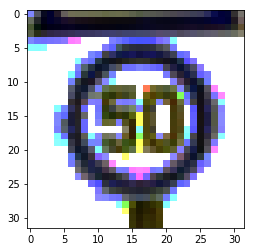

In [29]:
plt.imshow(img, cmap = ('gray'))

In [30]:
img = preprocess(img)

In [31]:
img = img.reshape(1, 32, 32, 3)

In [32]:
print("predicted sign: "+ str(model_save.predict_classes(img)))

predicted sign: [2]
